#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights = pd.read_csv('Merged_Table_1.csv')
flights.head(5)

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_delay,taxi_out,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,Trip_count_PerDay,Trip_count_Permonth,Trip_count_PerYear,origin_city_condn,dest_city_condn
0,0,0,2018-01-01,WN,5705,"Tampa, FL","Albany, NY",15,28.0,12.0,...,0,160,153.0,134.0,1130,1.001351,30.875000,61.750000,low_rainny,sunny
1,1,1,2018-01-01,WN,988,"New Orleans, LA","Houston, TX",6,-2.0,9.0,...,0,75,69.0,57.0,302,17.332432,534.416667,1068.833333,cloundy,sunny
2,2,2,2018-01-01,WN,1236,"New Orleans, LA","Orlando, FL",5,-1.0,8.0,...,0,100,86.0,70.0,551,5.255405,162.041667,324.083333,cloundy,low_rainny
3,3,3,2018-01-01,WN,233,"New Orleans, LA","Oakland, CA",15,16.0,8.0,...,0,290,283.0,271.0,1903,0.959459,29.583333,59.166667,cloundy,sunny
4,4,4,2018-01-01,WN,446,"New Orleans, LA","St. Louis, MO",18,3.0,6.0,...,0,105,125.0,83.0,604,1.981081,61.083333,122.166667,cloundy,sunny


In [4]:
"""
add month columns and monthly avg delay
"""
month_flights = pd.DataFrame(flights[['arr_delay', 'fl_date']])
month_flights['month'] = pd.to_datetime(flights['fl_date']).dt.to_period('M')
month_flights['month'] = month_flights['month'].astype(str)
average_delay_permonth = month_flights.groupby('month').mean().reset_index()

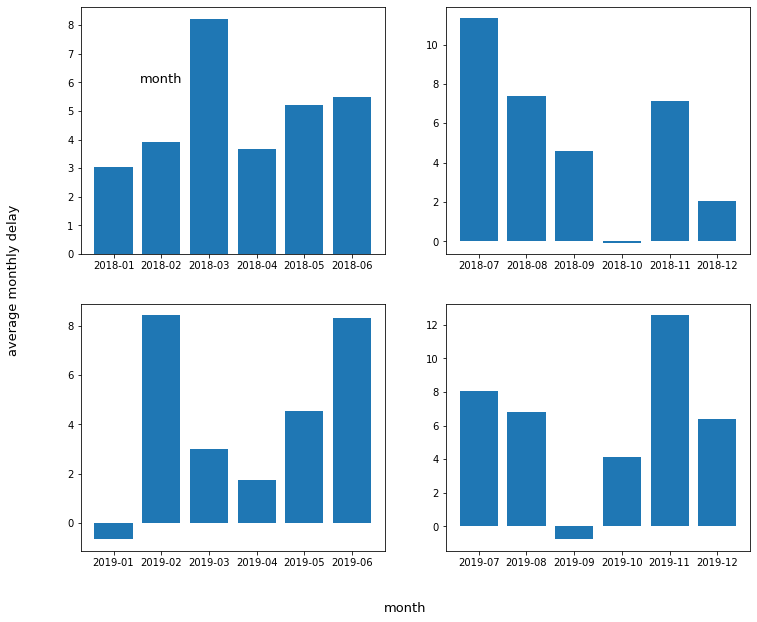

In [5]:
"""
plotting avg monthly delay
"""

fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].bar(average_delay_permonth['month'][0:6], average_delay_permonth['arr_delay'][0:6])
ax[0, 0].text(1, 6, 'month', ha='center',fontsize=13)
#ax[0, 0].text("abc", 'xa', s='as')


ax[0, 1].bar(average_delay_permonth['month'][6:12], average_delay_permonth['arr_delay'][6:12])


ax[1, 0].bar(average_delay_permonth['month'][12:18], average_delay_permonth['arr_delay'][12:18])


ax[1, 1].bar(average_delay_permonth['month'][18:24], average_delay_permonth['arr_delay'][18:24])

fig.text(0.5, 0.04, 'month', ha='center',fontsize=13)
fig.text(0.04, 0.5, 'average monthly delay', va='center', fontsize=13, rotation='vertical')
plt.show()